Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Load the DataSet and Processing

In [2]:
# cvt CSV to Dataframe

car_dataset=pd.read_csv('/content/car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# No of total Rows and Column
car_dataset.shape

(301, 9)

In [7]:
# to See the Information in the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
# to check for Missing Values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [12]:
# Check for the distibution of the Catagorical Data in the dataset
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding of the data


In [ ]:
# In Encodeing of the data,,, as the Machine learning model cannot understand Alpahabetes we cvt the Alphabets into Numerical values


In [17]:
# Encoding the Fuel_Type Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


/tmp/ipython-input-17-3856239372.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [19]:
# Encoding the Seller_Type Column

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [21]:
# Encoding the Transmission Column

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-21-179384251.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [22]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting of Data into Selected one and Target Data

In [24]:
X= car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [27]:
print(X)


     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [28]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting in to Train and Testing data

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Train the Model----->

Linear Regerssion

In [30]:
# load the regression Model
lin_reg_model=LinearRegression()

In [32]:
lin_reg_model.fit(X_train,Y_train)  # To Fit the Data into the Model ie-- X aand Y values

LinearRegression()

Evaluating the Model

In [33]:
# predict on the training data
training_data_Prediction=lin_reg_model.predict(X_train)

In [34]:
# R squared error
error_score=metrics.r2_score(Y_train,training_data_Prediction)
print("R Squared Error : " ,error_score)

R Squared Error :  0.8799451660493711


Visualizing the Actual and Predicted Prices

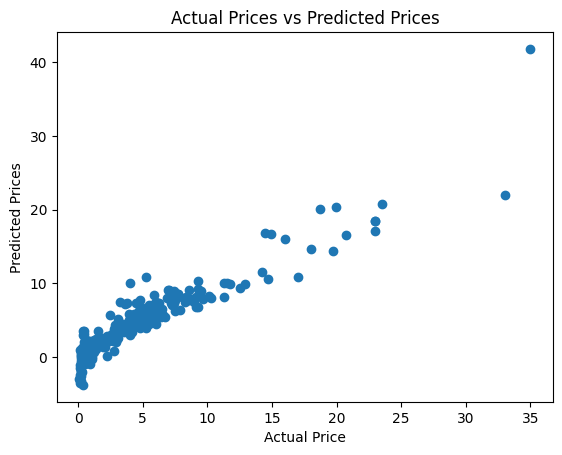

In [37]:
plt.scatter(Y_train,training_data_Prediction)
plt.xlabel("Actual Price")
plt.ylabel('Predicted Prices')
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction on test Data

In [38]:
# predict on the training data
test_data_Prediction=lin_reg_model.predict(X_test)

In [40]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_Prediction)
print("R Squared Error : " ,error_score)

R Squared Error :  0.8365766715027051


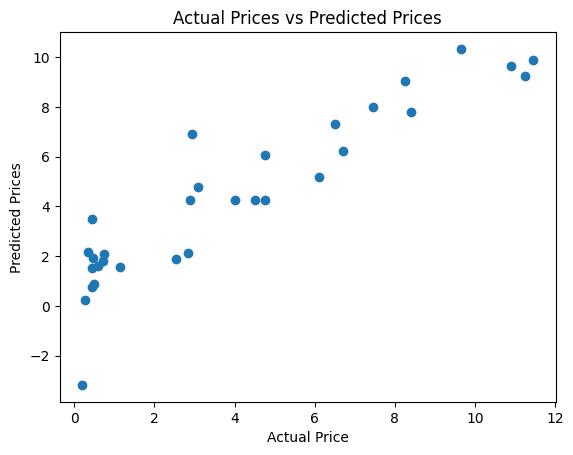

In [41]:
plt.scatter(Y_test,test_data_Prediction)
plt.xlabel("Actual Price")
plt.ylabel('Predicted Prices')
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Lasso regression Model Prediction


In [42]:
# load the Lasso regression Model
lass_reg_model=Lasso()

In [43]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Evaluating the Model

In [44]:
# predict on the training data
training_data_Prediction=lass_reg_model.predict(X_train)

In [45]:
# R squared error
error_score=metrics.r2_score(Y_train,training_data_Prediction)
print("R Squared Error : " ,error_score)

R Squared Error :  0.8427856123435794


Visualizing the Actual and Predicted Prices

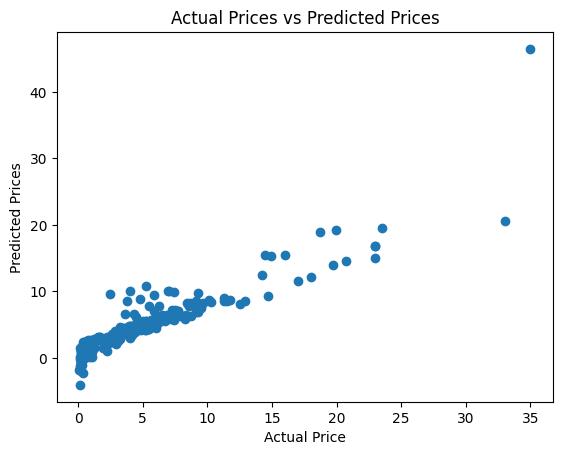

In [46]:
plt.scatter(Y_train,training_data_Prediction)
plt.xlabel("Actual Price")
plt.ylabel('Predicted Prices')
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction on test Data

In [47]:
# predict on the test data
test_data_Prediction=lass_reg_model.predict(X_test)

In [48]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_Prediction)
print("R Squared Error : " ,error_score)

R Squared Error :  0.8709167941173195


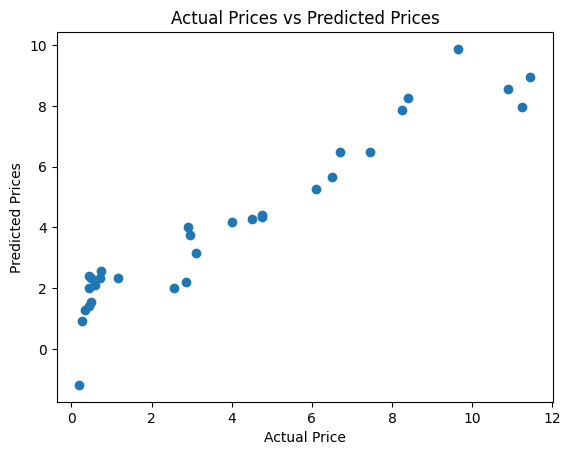

In [49]:
plt.scatter(Y_test,test_data_Prediction)
plt.xlabel("Actual Price")
plt.ylabel('Predicted Prices')
plt.title("Actual Prices vs Predicted Prices")
plt.show()